# **Training, Optimization and Evaluation**

→ In this notebook the model is trained, optimised and evaluated.


### **_IMPORTS_**

In [ ]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


Notebook "data_preprocessing.ipynb" run to get variables:

In [114]:
%run data_preprocessing.ipynb

### **_MODEL_**

#### Used GridSearch to find the best parameters for RandomForestRegressor model



In [ ]:
def randomForestReg(X_train, y_train, X_test, y_test, title=None, optimize=False, plot: bool = True):
    param_grid_rf = {
        'n_estimators': [200, 400, 600],
        'max_depth': [10, 15, 20]
    }

    randomForest = RandomForestRegressor(max_depth=15, n_estimators=600, random_state=42)

    if optimize:
        grid_search = GridSearchCV(estimator=randomForest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', verbose=1)
        grid_search.fit(X_train, y_train.values.ravel())  
        randomForest = grid_search.best_estimator_
        print(f"Beste Parameter für Random Forest: {grid_search.best_params_}")
    else:
        randomForest.fit(X_train, y_train.values.ravel())


    if plot:
        y_pred = randomForest.predict(X_test)
        
        print(f"{title}:")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
        print(f"R²-Score: {r2_score(y_test, y_pred)}")

        y_pred = randomForest.predict(X_test)

        y_test_values = y_test.values.ravel()  

        plt.figure(figsize=(8, 6))
        plt.scatter(y_test_values, y_pred, alpha=0.5)
        plt.plot([min(y_test_values), max(y_test_values)], 
                [min(y_test_values), max(y_test_values)], '--', color='red')  
        plt.xlabel("Tatsächliche Werte")
        plt.ylabel("Vorhergesagte Werte")
        plt.title("Tatsächliche vs. Vorhergesagte Kalorien")
        plt.show()



    return randomForest


Random Forest:
Mean Absolute Error: 1.778208479699241
Mean Squared Error: 8.101844449604718
Root Mean Squared Error: 2.846373912472625
R²-Score: 0.997871158196784


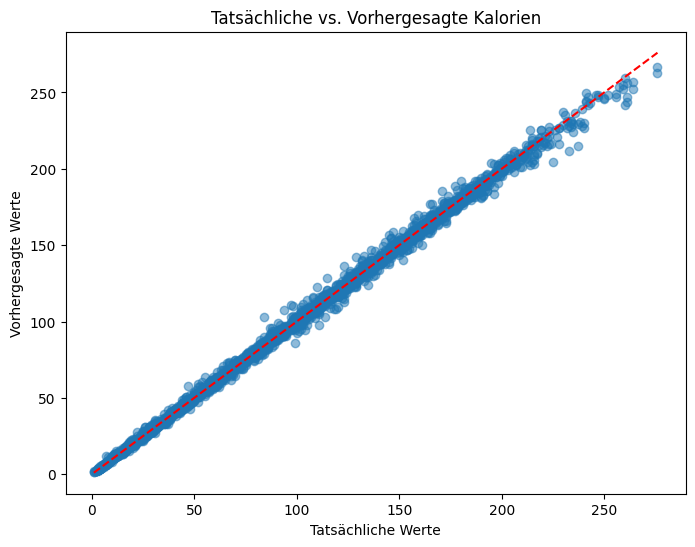

In [117]:
randomForest = randomForestReg(X_train, y_train, X_test, y_test, "Random Forest", False)


# Evaluierung:

### Interpretation of the results:
The evaluation metrics indicate that the random forest model performs very well:

- Mean Absolute Error (MAE): 1.78
→ The average absolute deviation of the predictions from the actual values is only around 1.78 units. This is a very low error value.

- Mean Squared Error (MSE): 8.10
→ Square deviations emphasise larger errors more strongly, but this value is also relatively low.

- Root mean squared error (RMSE): 2.85
→ RMSE is comparable to MAE, but emphasises larger errors more strongly. A value of 2.85 means that the average deviation of the predictions is around 2.85.

- R² score: 0.9979
→ This value is close to 1, which indicates that the model explains almost all of the variance in the data. A perfect model would have an R² value of 1.

### Conclusion:
The model provides very accurate predictions
